In [10]:
from typing import TypedDict, List, Dict
from langgraph.graph import StateGraph, START, END


In [11]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    finalNumber: int


In [12]:
def adder(state: AgentState) -> AgentState:
    "Adds 2 numbers"
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtractor(state: AgentState) -> AgentState:
    "Subtracts 2 numbers"
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state: AgentState) -> AgentState:
    "Decides which node to run next"
    if state["operator"] == "+":
        return "addition_operation"
    elif state["operator"] == "-":
        return "subtraction_operation"

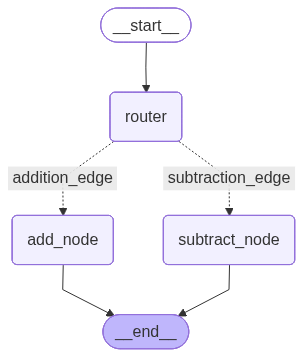

In [15]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state) #passthrough function

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_edge": "add_node",
        "subtraction_edge": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))